## Baseline 2
#### Simple CNN network using tensorflow img classification tutorial
https://www.tensorflow.org/tutorials/images/classification

In [155]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [156]:
file = '../data/home_sale_data_324.csv'

data = pd.read_csv(file)
labels = data['label']
data.drop(['label'], axis=1, inplace=True)
data.describe()

,OverallQual,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,...,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.0
mean,0.565136,0.550302,0.353143,0.201066,0.317285,0.660811,0.364171,0.494881,0.719569,0.391876,...,0.266919,0.605634,0.421848,0.439368,0.487118,0.511852,0.616627,0.0,0.0,0.0
std,0.155988,0.124790,0.152244,0.133037,0.143976,0.242686,0.134263,0.131448,0.219351,0.138140,...,0.442425,0.488798,0.493939,0.496395,0.499920,0.499945,0.486292,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.444444,0.459710,0.200000,0.088791,0.215054,0.473684,0.286236,0.402090,0.590580,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.555556,0.555832,0.400000,0.165185,0.322581,0.652632,0.348714,0.489055,0.731884,0.500000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
75%,0.666667,0.628834,0.400000,0.252738,0.387097,0.905263,0.445831,0.589757,0.934783,0.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [157]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)
print(labels)




[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [158]:
'''test reshape'''
tmp = [[1,2,3,4], [5,6, 7,8], [9,10,11,12]]
tmp = np.array(tmp)
tmp.shape
tmp.reshape(3,2,2)


array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [159]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

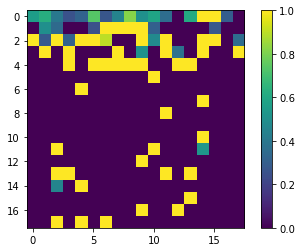

In [160]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [161]:
labels.shape

(2911, 4)

In [162]:
train_examples = data_np
train_examples.shape

(2911, 18, 18)

In [163]:
ttl_samples = train_examples.shape[0] 
val_ratio = 0.2
val_samples = int(val_ratio * train_examples.shape[0])

val_examples = train_examples[-1*val_samples:]
train_examples = train_examples[:-1*val_samples]
val_labels = labels[-1*val_samples:]
train_labels = labels[:-1*val_samples]

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [164]:
# train_dataset

In [165]:
train_examples.shape
val_examples.shape

(582, 18, 18)

In [166]:
trainX = train_examples.reshape(ttl_samples-val_samples, 18,18,1)
trainY = train_labels

testX = val_examples.reshape(val_samples, 18,18,1)
testY = val_labels


In [167]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [168]:
BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 64
epochs = 80

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

num_classes = 4

# Working
with tf.device('/cpu:0'):
	data_augmentation = tf.keras.Sequential([ 
		tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
  		tf.keras.layers.RandomRotation(0.05),
	    # tf.keras.layers.RandomZoom(0.05)
		])

# data_augmentation = tf.keras.Sequential(
#   [
#     tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#   ]
# )

model = tf.keras.Sequential([
	# data_augmentation,
  	# tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  	tf.keras.layers.Conv2D(16, (2, 2), padding='same', activation='relu', input_shape=(18, 18, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
  	tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
opt = tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [169]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 18, 18, 16)        80        
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 9, 9, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 2, 2, 64)       

In [170]:
#CPU
with tf.device('/CPU:0'):
    history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

# deafult go with GPU
# history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

Epoch 1/80
12/37 [========>.....................] - ETA: 0s - loss: 1.4009 - accuracy: 0.2292

2022-04-19 20:21:38.512095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 1s 12ms/step - loss: 1.3915 - accuracy: 0.2443 - val_loss: 1.3863 - val_accuracy: 0.2113
Epoch 2/80
15/37 [===========>..................] - ETA: 0s - loss: 1.3866 - accuracy: 0.2396

2022-04-19 20:21:38.941101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 9ms/step - loss: 1.3871 - accuracy: 0.2435 - val_loss: 1.3858 - val_accuracy: 0.2113
Epoch 3/80
37/37 [==============================] - 0s 9ms/step - loss: 1.3851 - accuracy: 0.2804 - val_loss: 1.3779 - val_accuracy: 0.3299
Epoch 4/80
37/37 [==============================] - 0s 9ms/step - loss: 1.3831 - accuracy: 0.2765 - val_loss: 1.3465 - val_accuracy: 0.3540
Epoch 5/80
37/37 [==============================] - 0s 10ms/step - loss: 1.3751 - accuracy: 0.2894 - val_loss: 1.3364 - val_accuracy: 0.3436
Epoch 6/80
37/37 [==============================] - 0s 9ms/step - loss: 1.3721 - accuracy: 0.3040 - val_loss: 1.3392 - val_accuracy: 0.3402
Epoch 7/80
37/37 [==============================] - 0s 9ms/step - loss: 1.3673 - accuracy: 0.3220 - val_loss: 1.3274 - val_accuracy: 0.3660
Epoch 8/80
37/37 [==============================] - 0s 9ms/step - loss: 1.3639 - accuracy: 0.3207 - val_loss: 1.3336 - val_accuracy: 0.3196
Epoch 9/80
37/37 [============

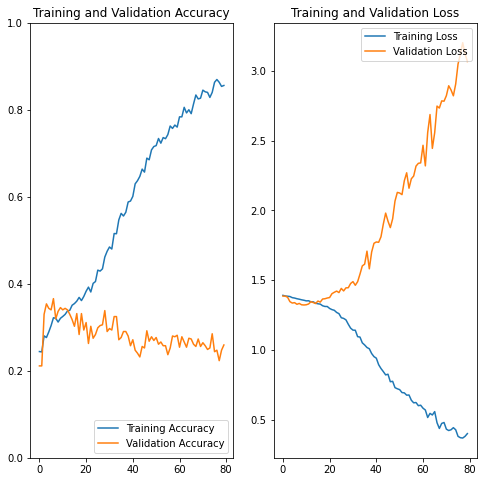

In [171]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [154]:
%reset -f

In [72]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
# epochs = 25
# # history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))
# history = model.fit(train_dataset, epochs=epochs)
